In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [3]:
# print(X_train[10])

In [6]:
print(X_train[10].shape)

(28, 28)


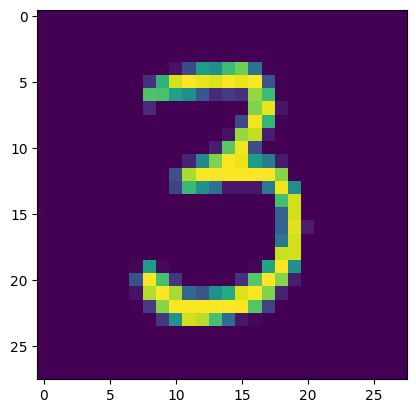

3


In [7]:
plt.imshow(X_train[50])
plt.show()

print(y_train[50])

In [8]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [9]:
print(np.unique(y_train))

print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [10]:
#scaling the values
X_train = X_train/255
X_test = X_test/255

In [11]:
# print(X_train[50])

In [ ]:
#Building the NN

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8522 - loss: 0.5142
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9523 - loss: 0.1617
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9650 - loss: 0.1164
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9717 - loss: 0.0907
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9773 - loss: 0.0729
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9812 - loss: 0.0608
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9841 - loss: 0.0511
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9860 - loss: 0.0440
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9881 - loss: 0.0378
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9896 - loss: 0.0332


Training data accuracy is 98.96%

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 0.1365
0.9707000255584717


Test data accuracy is 97.07%

In [ ]:
y_pred = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
print(y_pred[0])

[5.1294815e-02 3.4690249e-05 3.9905429e-01 9.4382173e-01 4.7842633e-08
 1.0115858e-02 2.6107243e-14 9.9999881e-01 1.4903081e-02 8.3561319e-01]


In [ ]:
np.argmax(y_pred[0])

np.int64(7)

In [ ]:
y_pred_label = [np.argmax(i) for i in y_pred]
print(y_pred_label)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(2), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred_label)

In [ ]:
print(conf_matrix)

tf.Tensor(
[[ 952    0    4    2    2    3    6    2    1    8]
 [   0 1112    3    4    0    1    3    0   12    0]
 [   1    0 1008    4    1    1    3    2   12    0]
 [   0    0    5  987    1    8    0    4    3    2]
 [   0    0    2    1  963    1    4    1    1    9]
 [   3    0    0   14    2  863    3    2    4    1]
 [   2    3    1    1    5   10  932    2    2    0]
 [   0    2   16    4    0    0    0  988    3   15]
 [   3    0    4   12    5    8    2    2  933    5]
 [   1    2    0    9   13    5    1    4    5  969]], shape=(10, 10), dtype=int32)


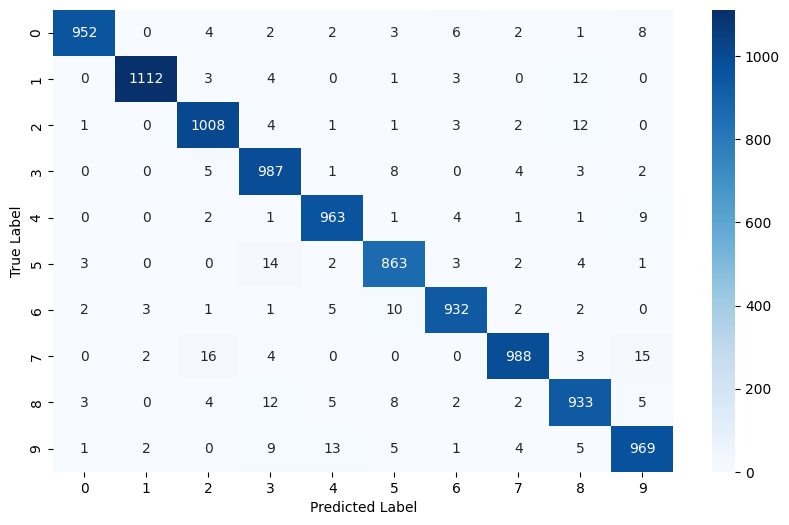

In [ ]:
plt.figure(figsize = (10,6))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [ ]:
# input_path = ''
# input_image = cv2.imread(input_path)
# cv2_imshow(input_image)
# grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
# input_image_resize = cv2.resize(grayscale, (28,28))
# input_image_resize = input_image_resize/255
# image_reshaped = np.reshape(input_image_resize, [1,28,28])
# input_prediction = model.predict(image_reshaped)
# input_label = np.argmax(input_prediction)
# print("The digit is: ", input_label)